In [ ]:
#| default_exp utils

# utils
> Stuff for things and such!

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from fastcore.utils import *
from fastcore.test import *
from PIL import Image
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# global constants

In [ ]:
#| export
CREDS = {
    "host" : "localhost",
    "database" : "rorymccallion",
    "user" : "rorymccallion" 
}

A `CREDS` dicts contains the keys `host`, `database`, and `user` (all values are `str`s).

In [ ]:
#| export
Q = [
    """select 1""",
    
    """select email, url from pageviews limit 5""",
    
    """select
  c1,
  c2 as "foo",
  c3+c4 as "bar",
  count(distinct things)
from pageviews pv
join users u using (user_id)
left join accounts a on (u.account_id = a.id)
where c5 > 0
  and c6 is not null
group by c1
having count(distinct things) > 1
order by count(distinct things)
limit 5""",
    
    """select
  accountid as account_id,
  closedate as close_date,
  company_industry_group__c as industry,
  amount
from opportunity_raw
where iswon
  and amount > 0""",
]

In [ ]:
for q in Q: print(q, "\n")

select 1 

select email, url from pageviews limit 5 

select
  c1,
  c2 as "foo",
  c3+c4 as "bar",
  count(distinct things)
from pageviews pv
join users u using (user_id)
left join accounts a on (u.account_id = a.id)
where c5 > 0
  and c6 is not null
group by c1
having count(distinct things) > 1
order by count(distinct things)
limit 5 

select
  accountid as account_id,
  closedate as close_date,
  company_industry_group__c as industry,
  amount
from opportunity_raw
where iswon
  and amount > 0 



# images

In [ ]:
#| export
css2name = {
    'white'             : 'white',
    'whitesmoke'        : 'lightgrey',
    'lightgrey'         : 'grey',
    'grey'              : 'darkgrey',
    'black'             : 'black',
    'midnightblue'      : 'darkblue',
    'blue'              : 'blue',
    'darkviolet'        : 'purple',
    'violet'            : 'pink',
    'magenta'           : 'magenta',
    'deeppink'          : 'deeppink',
    'tomato'            : 'red',
    'darkorange'        : 'orange',
    'gold'              : 'gold',
    'yellow'            : 'yellow',
    'chartreuse'        : 'lime',
    'lime'              : 'green',
    'mediumspringgreen' : 'bluegreen',
    'aquamarine'        : 'mint',
    'cyan'              : 'cyan',
    'beige'             : 'beige',
}

In [ ]:
css2name

{'white': 'white',
 'whitesmoke': 'lightgrey',
 'lightgrey': 'grey',
 'grey': 'darkgrey',
 'black': 'black',
 'midnightblue': 'darkblue',
 'blue': 'blue',
 'darkviolet': 'purple',
 'violet': 'pink',
 'magenta': 'magenta',
 'deeppink': 'deeppink',
 'tomato': 'red',
 'darkorange': 'orange',
 'gold': 'gold',
 'yellow': 'yellow',
 'chartreuse': 'lime',
 'lime': 'green',
 'mediumspringgreen': 'bluegreen',
 'aquamarine': 'mint',
 'cyan': 'cyan',
 'beige': 'beige'}

In [ ]:
test_eq(len(css2name), 21)

In [ ]:
#| export
color_vals = [x/100 for x in range(0, len(css2name)*5, 5)]
colors = {k:v for k,v in zip(list(css2name.values()), color_vals)}

In [ ]:
#| export
color_map = LinearSegmentedColormap.from_list(
    "Colors are mapped to floats between 0 and 1",
    list(css2name.keys()))

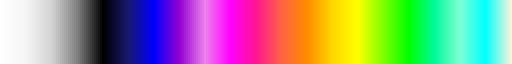

In [ ]:
color_map

In [ ]:
colors

{'white': 0.0,
 'lightgrey': 0.05,
 'grey': 0.1,
 'darkgrey': 0.15,
 'black': 0.2,
 'darkblue': 0.25,
 'blue': 0.3,
 'purple': 0.35,
 'pink': 0.4,
 'magenta': 0.45,
 'deeppink': 0.5,
 'red': 0.55,
 'orange': 0.6,
 'gold': 0.65,
 'yellow': 0.7,
 'lime': 0.75,
 'green': 0.8,
 'bluegreen': 0.85,
 'mint': 0.9,
 'cyan': 0.95,
 'beige': 1.0}

In [ ]:
#| export
def rect(hw, color):
    return np.ones(hw) * colors[color]

def to_img(array, reduce_by=1) -> Image:
    img = Image.fromarray(color_map(array, bytes=True))
    return img.reduce(reduce_by)

In [ ]:
to_img(rect((50, 25), 'magenta'))